# Logistic Regression - Assignment 3

2. Using the data set of two quality test results of a microchip product, design a predictor using logistic regression which will predict the acceptance or rejection of the microchip given the two test results. Use regularizer to further tune the parameters. Use 70 % data for training and rest 30% data for testing your predictor and calculate the efficiency of the predictor/hypothesis.

Hints: 	
        1. You can pre process  the data for convenience
		2. You must use Python program for evaluating parameters using batch gradient descent algorithm (GDA). 
        No function should be used for GDA.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Read the data

In [2]:
data = pd.read_csv('Data set for microchip quality Assurance 2019.csv')
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,t1,t2,qa
0,0.82316,0.66301,0
1,0.46601,-0.41886,0
2,-0.21371,0.69225,1
3,-0.39228,-0.25804,0
4,-0.48445,0.99927,0


### Adding bias to the data

In [3]:
x = np.array(data.iloc[:,[0,1]])
y = np.array(data.iloc[:,2]).reshape(-1,1)
x = np.insert(x, 0, 1,axis = 1)
x[:5]

array([[ 1.     ,  0.82316,  0.66301],
       [ 1.     ,  0.46601, -0.41886],
       [ 1.     , -0.21371,  0.69225],
       [ 1.     , -0.39228, -0.25804],
       [ 1.     , -0.48445,  0.99927]])

### Split the data to train & test (70 - 30 split)

In [4]:
d = int(y.shape[0] * 0.7)

xtrain = x[:d]
xtest = x[d:]
ytrain = y[:d]
ytest = y[d:]

### Cost function

In [5]:
def cost(x,y,w,lamb):
    h = 1/ (1 + np.exp(- np.matmul(x,w)))
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum() 
    return (cost + lamb * np.dot(w.T,w)[0,0]) / y.shape[0]
w = np.zeros((3,1))
cost(x,y,w,5)

0.6931471805599454

### Gradient descent 

In [6]:
def gradient_descent(x, y, alpha, lamb, iterations):
    m = y.shape[0]
    cost_list = []
    grad_list = []
    w = np.zeros((x.shape[1],1))
    for i in range(iterations):
        h = 1/ (1 + np.exp(- np.matmul(x,w))) 
        w1 = np.array(w,copy=True)
        w1[0,0]= 0
        grad = np.dot(x.T,(h - y)) + lamb * w1
        grad_list.append(grad)
        w = w - (alpha/m) * grad
        if (np.abs(grad) > 0.01).sum() == 0:
            break
        cost_list.append(cost(x,y,w,lamb))
    return cost_list, grad_list, w

### Calling GD with alpha = 0.01 and iterations = 100

In [7]:
cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.01, 0, 10000)

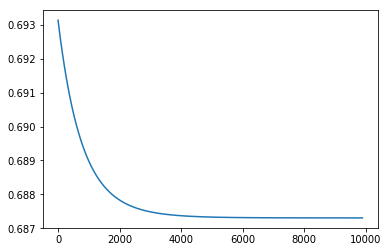

In [8]:
plt.plot(cost_list)

### Drawing decision boundary

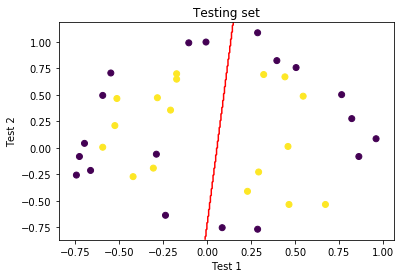

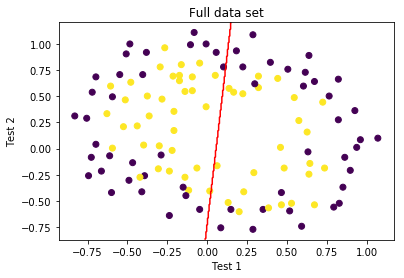

In [9]:
def predict(x,w):
    return (np.insert(x,0,1,axis=1) @ w) > 0
    
def plot(x,y,w,title):
    h = .005  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = x[:, 1].min() - .1, x[:, 1].max() + .1
    y_min, y_max = x[:, 2].min() - .1, x[:, 2].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = predict(np.c_[xx.ravel(), yy.ravel()],w)

    Z = Z.reshape(xx.shape)
    plt.title(title)
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.scatter(x[:,1], x[:,2],c=y.reshape(-1,))
    CS = plt.contour(xx, yy, Z,levels=[0.5],colors=('r',))
    #plt.clabel(CS, colors = 'r', fontsize=10)
    plt.show()
plot(xtest,ytest,w,'Testing set')
plot(x,y,w,'Full data set')

In [10]:
def accuracy(x, y, w):
    h = np.dot(x, w) > 0
    e = np.abs(h - y).sum()
    return 1 - (e)/len(y)

In [11]:
accuracy(x,y,w)

0.5423728813559322

Clearly Data is not linearly seperable, so we need to add polynomial terms

# Adding Polynomial Features & Regularisation

Added $X_1^2$ and $X_2^2$ terms

In [12]:
X = np.insert(x,3,x[:,1]**2,axis=1)
X = np.insert(X,4,x[:,2]**2,axis=1)
xtrain = X[:d]
xtest = X[d:]
X[:5]

array([[ 1.        ,  0.82316   ,  0.66301   ,  0.67759239,  0.43958226],
       [ 1.        ,  0.46601   , -0.41886   ,  0.21716532,  0.1754437 ],
       [ 1.        , -0.21371   ,  0.69225   ,  0.04567196,  0.47921006],
       [ 1.        , -0.39228   , -0.25804   ,  0.1538836 ,  0.06658464],
       [ 1.        , -0.48445   ,  0.99927   ,  0.2346918 ,  0.99854053]])

In [13]:
cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.15, 0.05, 8000)

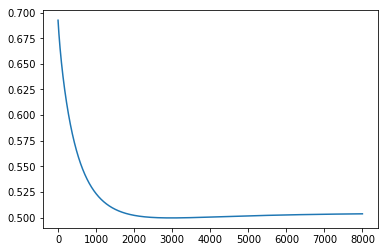

In [14]:
plt.plot(cost_list)

In [15]:
accuracy(xtest,ytest,w)

0.9166666666666666

Accuracy has increased 

In [16]:
def predict(x,w):
    t = np.insert(x,0,1,axis=1) 
    T = np.insert(t,3,t[:,1]**2,axis=1)
    T = np.insert(T,4,t[:,2]**2,axis=1)
    Z = 1/ (1 + np.exp(- np.matmul(T,w))) 
    return  Z

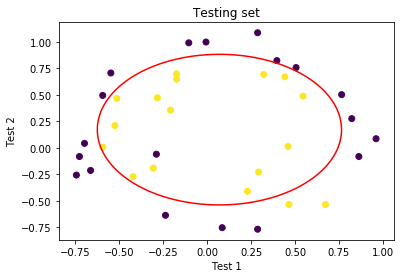

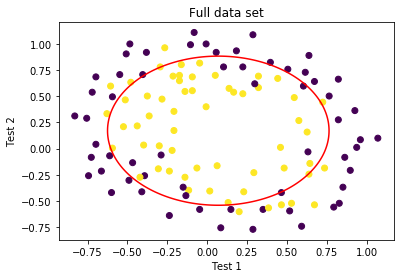

In [17]:
plot(xtest,ytest,w,'Testing set')
plot(x,y,w,'Full data set')

In [18]:
accuracy(xtest,ytest,w)

0.9166666666666666

Better predictor was found
Now let's expiriment on the effect of lambda on the decision boundry

## Experiments

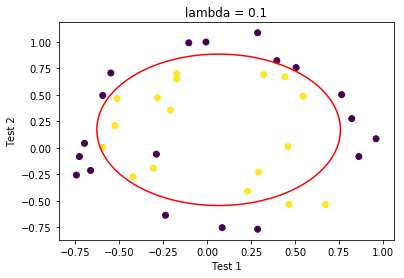

Accuracy: 0.9166666666666666


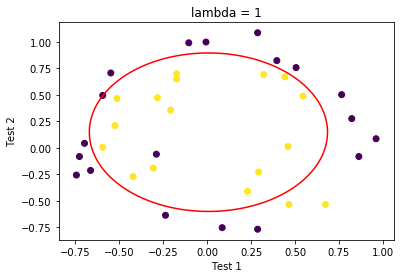

Accuracy: 0.9166666666666666


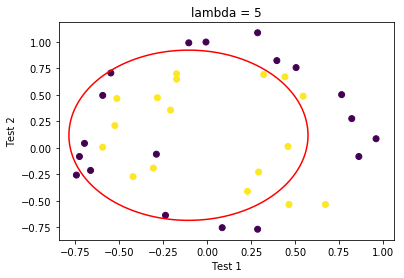

Accuracy: 0.6944444444444444


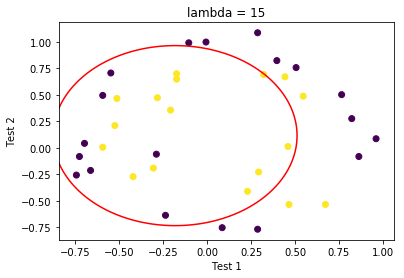

Accuracy: 0.6666666666666667


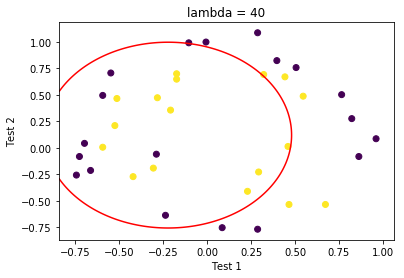

Accuracy: 0.6388888888888888


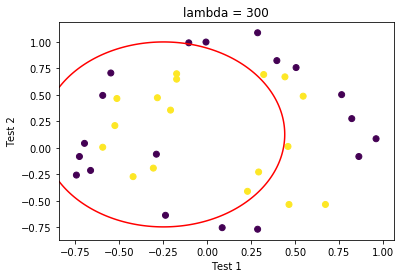

Accuracy: 0.6111111111111112


In [20]:
for i in [0.1,1,5,15,40,300]:
    cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.15, i, 10000)
    a = accuracy(xtest,ytest,w)
    plot(xtest,ytest,w,'lambda = '+ str(i))
    print("Accuracy: "+ str(a))


As we can see here, when lambda is increased decision boundry is changing in an undesirable manner 